In [1]:
network_file = "JSApp/network1/network.txt"

In [9]:
with open(network_file) as f: network = f.readlines()
network = [tuple(map(int, line.split())) for line in network]

In [10]:
print(network)

[(1, 2), (1, 3), (2, 4), (2, 3), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (10, 11), (10, 12), (10, 13), (10, 14), (12, 13), (12, 14), (12, 15), (12, 16), (12, 17), (13, 14), (18, 19), (18, 20), (18, 21), (18, 22), (18, 23), (18, 24), (18, 25), (19, 20), (19, 21), (20, 21), (26, 27), (26, 28), (27, 28), (29, 30), (29, 31), (30, 31), (32, 33), (32, 34), (33, 34), (33, 35), (33, 36), (33, 37), (34, 35), (34, 36), (34, 37), (38, 39), (38, 40), (39, 40), (41, 42), (41, 43), (41, 44), (41, 45), (41, 46), (41, 47), (41, 48), (41, 49), (41, 50), (41, 51), (42, 43), (44, 45), (44, 52), (44, 53), (44, 54), (44, 46), (44, 47), (44, 55), (44, 56), (44, 57), (44, 58), (44, 59), (44, 60), (44, 61), (44, 62), (44, 63), (44, 64), (44, 65), (44, 66), (44, 67), (44, 68), (44, 69), (44, 70), (44, 71), (44, 50), (44, 72), (44, 73), (44, 74), (44, 75), (44, 76), (44, 77), (44, 78), (44, 79), (44, 80), (45, 54), (45, 46), (45, 47), (45, 55), (45, 56), (45, 57), (45, 69

In [17]:
def make_graph(network):
    graph = {}
    for src, dst in network:
        if src not in graph:
            graph[src] = {"weights": [], "nodes": []}
        if dst not in graph[src]["nodes"]: graph[src]["nodes"].append(dst)
        if dst not in graph:
            graph[dst] = {"weights": [], "nodes": []}
        if src not in graph[dst]["nodes"]: graph[dst]["nodes"].append(src)
    
    # random weights
    for node, data in graph.items():
        n_nodes = len(data["nodes"])
        # make N random numbers that sum to 1
        weights = [1/n_nodes] * n_nodes
        graph[node]["weights"] = weights
    return graph

In [18]:
graph = make_graph(network)

In [26]:
len(graph)

1461

In [19]:
graph

{1: {'weights': [0.5, 0.5], 'nodes': [2, 3]},
 2: {'weights': [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
  'nodes': [1, 4, 3]},
 3: {'weights': [0.5, 0.5], 'nodes': [1, 2]},
 4: {'weights': [1.0], 'nodes': [2]},
 5: {'weights': [0.25, 0.25, 0.25, 0.25], 'nodes': [6, 7, 8, 9]},
 6: {'weights': [0.25, 0.25, 0.25, 0.25], 'nodes': [5, 7, 8, 9]},
 7: {'weights': [0.25, 0.25, 0.25, 0.25], 'nodes': [5, 6, 8, 9]},
 8: {'weights': [0.25, 0.25, 0.25, 0.25], 'nodes': [5, 6, 7, 9]},
 9: {'weights': [0.25, 0.25, 0.25, 0.25], 'nodes': [5, 6, 7, 8]},
 10: {'weights': [0.25, 0.25, 0.25, 0.25], 'nodes': [11, 12, 13, 14]},
 11: {'weights': [1.0], 'nodes': [10]},
 12: {'weights': [0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666,
   0.16666666666666666],
  'nodes': [10, 13, 14, 15, 16, 17]},
 13: {'weights': [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
  'nodes': [10, 12, 14]},
 14: {'weights': [0.33333

In [20]:
import random

In [103]:

def icm(graph, activated):
    """_summary_
    Independent Cascade Model

    Args:
        graph (dict): Dictionary of nodes and their neighbors with weights
        activated (dict): set of activated nodes
    """
    time = 0
    dead = set()
    while True:
        new_activated = set()
        for node in activated:
            if node not in dead:
                for neighbor, weight in zip(graph[node]["nodes"], graph[node]["weights"]):
                    if neighbor not in activated and random.random() < weight:
                        new_activated.add(neighbor)
                dead.add(node)
        if not new_activated: break
        activated.update(new_activated)
        time += 1
    return activated, time

In [41]:
random.choice([10,11])

11

In [80]:
keys = list(graph.keys())
results = []
for i in range(10_000):
    n_starting = i // 100 + 1
    starting_set = set([random.choice(keys) for _ in range(n_starting)])
    active, time = icm(graph, starting_set.copy())
    results.append({
        "n_starting": n_starting, "starting_set": starting_set, "active": active, "time": time})

In [81]:
time_wrt_starting_nodes = {}
for result in results:
    n_starting = result["n_starting"]
    if n_starting not in time_wrt_starting_nodes:
        time_wrt_starting_nodes[n_starting] = []
    time_wrt_starting_nodes[n_starting].append(result["time"])
for key in time_wrt_starting_nodes:
    time_wrt_starting_nodes[key] = sum(time_wrt_starting_nodes[key]) / len(time_wrt_starting_nodes[key])

In [82]:
time_wrt_starting_nodes

{1: 6.54,
 2: 11.55,
 3: 24.63,
 4: 30.38,
 5: 33.02,
 6: 37.35,
 7: 41.5,
 8: 41.97,
 9: 39.59,
 10: 44.02,
 11: 41.31,
 12: 41.09,
 13: 43.04,
 14: 40.24,
 15: 43.19,
 16: 40.59,
 17: 41.37,
 18: 39.49,
 19: 38.45,
 20: 39.3,
 21: 38.68,
 22: 38.76,
 23: 38.83,
 24: 37.95,
 25: 37.02,
 26: 36.58,
 27: 36.54,
 28: 36.5,
 29: 35.62,
 30: 36.14,
 31: 35.84,
 32: 34.19,
 33: 33.71,
 34: 34.78,
 35: 35.33,
 36: 35.03,
 37: 34.63,
 38: 33.79,
 39: 33.23,
 40: 32.52,
 41: 32.46,
 42: 31.49,
 43: 33.02,
 44: 31.97,
 45: 32.66,
 46: 32.47,
 47: 31.62,
 48: 31.89,
 49: 32.19,
 50: 31.77,
 51: 32.96,
 52: 31.08,
 53: 31.66,
 54: 32.06,
 55: 30.64,
 56: 30.66,
 57: 31.08,
 58: 30.83,
 59: 30.7,
 60: 30.37,
 61: 30.6,
 62: 30.69,
 63: 30.0,
 64: 29.52,
 65: 30.84,
 66: 30.19,
 67: 30.61,
 68: 30.12,
 69: 29.29,
 70: 29.58,
 71: 28.52,
 72: 28.97,
 73: 29.23,
 74: 28.88,
 75: 29.48,
 76: 29.3,
 77: 28.61,
 78: 28.44,
 79: 29.04,
 80: 28.36,
 81: 28.6,
 82: 29.66,
 83: 28.71,
 84: 28.66,
 85: 27.94

In [86]:
percentage_activated_wrt_starting_nodes = {}
for result in results:
    n_starting = result["n_starting"]
    if n_starting not in percentage_activated_wrt_starting_nodes:
        percentage_activated_wrt_starting_nodes[n_starting] = []
    percentage_activated_wrt_starting_nodes[n_starting].append(len(result["active"]) / len(graph.keys()))
for key in percentage_activated_wrt_starting_nodes:
    percentage_activated_wrt_starting_nodes[key] = sum(percentage_activated_wrt_starting_nodes[key]) / len(percentage_activated_wrt_starting_nodes[key])

Text(0.5, 1.0, 'Network Science - Time Taken vs No. of Starting Nodes')

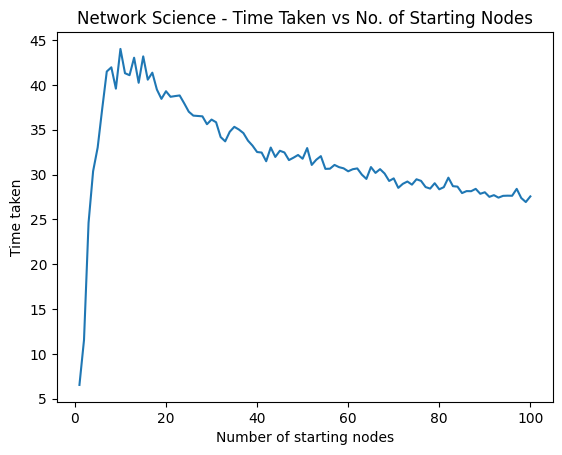

In [94]:
import matplotlib.pyplot as plt
plt.plot(list(time_wrt_starting_nodes.keys()), list(time_wrt_starting_nodes.values()))
plt.xlabel("Number of starting nodes")
plt.ylabel("Time taken")
plt.title("Network Science - Time Taken vs No. of Starting Nodes")

Text(0.5, 1.0, 'Network Science - % Nodes activated vs No. of starting nodes')

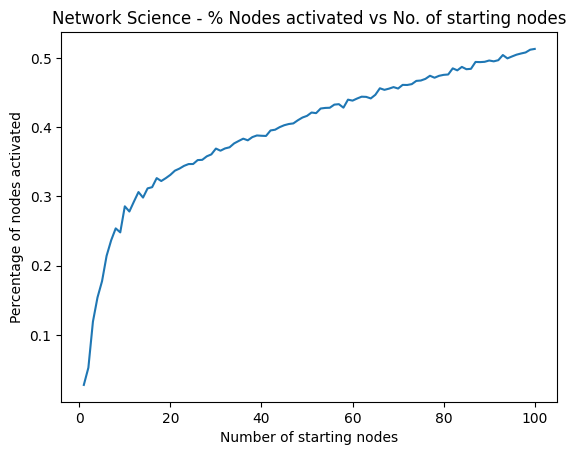

In [92]:
plt.plot(list(percentage_activated_wrt_starting_nodes.keys()), list(percentage_activated_wrt_starting_nodes.values()))
plt.xlabel("Number of starting nodes")
plt.ylabel("Percentage of nodes activated")
plt.title("Network Science - % Nodes activated vs No. of starting nodes")

In [95]:
network_file = "JSApp/network2/network.txt"
with open(network_file) as f: network = f.readlines()
network = [tuple(map(int, line.split())) for line in network]
graph = make_graph(network)

In [97]:
len(graph)

829

In [98]:
keys = list(graph.keys())
results = []
for i in range(10_000):
    n_starting = i // 100 + 1
    starting_set = set([random.choice(keys) for _ in range(n_starting)])
    active, time = icm(graph, starting_set.copy())
    results.append({
        "n_starting": n_starting, "starting_set": starting_set, "active": active, "time": time})

In [99]:
time_wrt_starting_nodes = {}
for result in results:
    n_starting = result["n_starting"]
    if n_starting not in time_wrt_starting_nodes:
        time_wrt_starting_nodes[n_starting] = []
    time_wrt_starting_nodes[n_starting].append(result["time"])
for key in time_wrt_starting_nodes:
    time_wrt_starting_nodes[key] = sum(time_wrt_starting_nodes[key]) / len(time_wrt_starting_nodes[key])

In [100]:
percentage_activated_wrt_starting_nodes = {}
for result in results:
    n_starting = result["n_starting"]
    if n_starting not in percentage_activated_wrt_starting_nodes:
        percentage_activated_wrt_starting_nodes[n_starting] = []
    percentage_activated_wrt_starting_nodes[n_starting].append(len(result["active"]) / len(graph.keys()))
for key in percentage_activated_wrt_starting_nodes:
    percentage_activated_wrt_starting_nodes[key] = sum(percentage_activated_wrt_starting_nodes[key]) / len(percentage_activated_wrt_starting_nodes[key])

Text(0.5, 1.0, 'Moreno Crime - Time Taken vs No. of Starting Nodes')

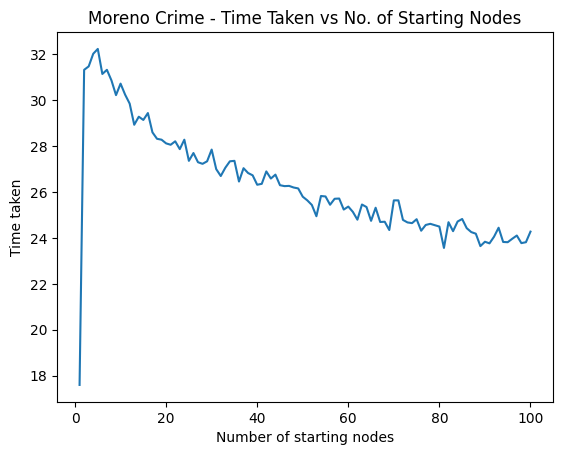

In [101]:
import matplotlib.pyplot as plt
plt.plot(list(time_wrt_starting_nodes.keys()), list(time_wrt_starting_nodes.values()))
plt.xlabel("Number of starting nodes")
plt.ylabel("Time taken")
plt.title("Moreno Crime - Time Taken vs No. of Starting Nodes")

Text(0.5, 1.0, 'Moreno Crime - % Nodes activated vs No. of starting nodes')

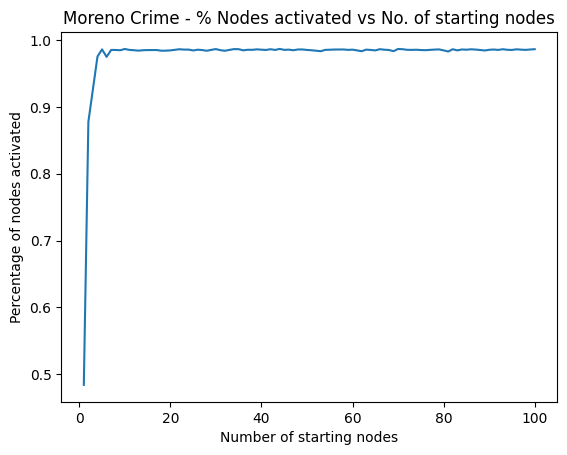

In [102]:
plt.plot(list(percentage_activated_wrt_starting_nodes.keys()), list(percentage_activated_wrt_starting_nodes.values()))
plt.xlabel("Number of starting nodes")
plt.ylabel("Percentage of nodes activated")
plt.title("Moreno Crime - % Nodes activated vs No. of starting nodes")